# What's this notebook about?

### Dr. Tirthajyoti Sarkar, Fremont, CA 94536, June 2019

There are many filters that are designed to work with gray-scale images but not with color images. To simplify the process of creating functions that can adapt to RGB images, scikit-image provides the **`adapt_rgb` decorator**.

We will demonsrate the use with the famous **[Sobel filter](https://en.wikipedia.org/wiki/Sobel_operator)**.

To actually use the `adapt_rgb` decorator, you have to decide how you want to adapt the RGB image for use with the gray-scale filter. There are two pre-defined handlers:

`each_channel`<br>
Pass each of the RGB channels to the filter one-by-one, and stitch the results back into an RGB image.

`hsv_value`<br>
Convert the RGB image to HSV and pass the value channel to the filter. The filtered result is inserted back into the HSV image and converted back to RGB.

### Wrap filter functions with decorators

In [1]:
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage import filters


@adapt_rgb(each_channel)
def sobel_each(image):
    return filters.sobel(image)


@adapt_rgb(hsv_value)
def sobel_hsv(image):
    return filters.sobel(image)

### We can use these functions as we would normally use them, but now they work with both gray-scale and color images.

In [2]:
from skimage import data
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt

In [3]:
image = data.astronaut()

In [4]:
image.shape

(512, 512, 3)

### Normal Sobel filter does not work on this image

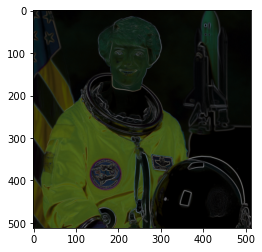

In [5]:
try:
    plt.imshow(filters.sobel(image))
except ValueError as e:
    print(e)

### When used with the decorator, it works

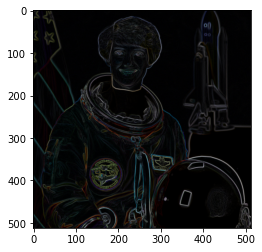

In [6]:
plt.imshow(sobel_each(image))
plt.show()

### We can take the complement and rescale the intensity

Text(0.5, 1.0, 'Sobel filter computed\n on value converted image (HSV)')

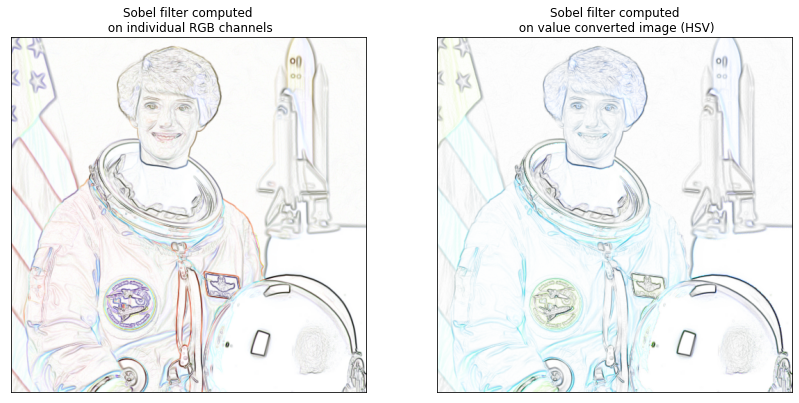

In [7]:
fig, (ax_each, ax_hsv) = plt.subplots(ncols=2, figsize=(14, 7))

# We use 1 - sobel_each(image) but this won't work if image is not normalized
ax_each.imshow(rescale_intensity(1 - sobel_each(image)))
ax_each.set_xticks([]), ax_each.set_yticks([])
ax_each.set_title("Sobel filter computed\n on individual RGB channels")

# We use 1 - sobel_hsv(image) but this won't work if image is not normalized
ax_hsv.imshow(rescale_intensity(1 - sobel_hsv(image)))
ax_hsv.set_xticks([]), ax_hsv.set_yticks([])
ax_hsv.set_title("Sobel filter computed\n on value converted image (HSV)")